In [1]:
#standard library load

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as skl
import seaborn as sns
import gc

#https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

In [2]:
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


In [3]:
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4

In [4]:
import xgboost as xgb

from xgboost.sklearn import XGBClassifier

from sklearn.grid_search import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold


/home/gilles/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/gilles/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [72]:
#load the data

train = pd.read_csv("Data/V4_trainvarclean.csv")

In [73]:
train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_YEAR_6.0,AMT_REQ_CREDIT_BUREAU_YEAR_7.0,AMT_REQ_CREDIT_BUREAU_YEAR_8.0,AMT_REQ_CREDIT_BUREAU_YEAR_9.0,AMT_REQ_CREDIT_BUREAU_YEAR_10.0,AMT_REQ_CREDIT_BUREAU_YEAR_11.0,AMT_REQ_CREDIT_BUREAU_YEAR_12.0,AMT_REQ_CREDIT_BUREAU_YEAR_13.0,AMT_REQ_CREDIT_BUREAU_YEAR_14.0,AMT_REQ_CREDIT_BUREAU_YEAR_17.0
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,...,0,0,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0154eee550>]], dtype=object)

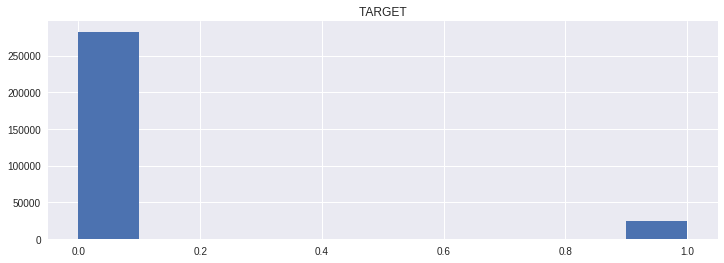

In [74]:
train.hist(column ='TARGET')

In [75]:
test = pd.read_csv("Data/V4_testvarclean.csv")

In [76]:
print(train.shape, test.shape)

(307511, 2036) (48744, 2035)


In [77]:
train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_YEAR_6.0,AMT_REQ_CREDIT_BUREAU_YEAR_7.0,AMT_REQ_CREDIT_BUREAU_YEAR_8.0,AMT_REQ_CREDIT_BUREAU_YEAR_9.0,AMT_REQ_CREDIT_BUREAU_YEAR_10.0,AMT_REQ_CREDIT_BUREAU_YEAR_11.0,AMT_REQ_CREDIT_BUREAU_YEAR_12.0,AMT_REQ_CREDIT_BUREAU_YEAR_13.0,AMT_REQ_CREDIT_BUREAU_YEAR_14.0,AMT_REQ_CREDIT_BUREAU_YEAR_17.0
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# get the labels
y = train.TARGET.values
train.drop(['TARGET', "SK_ID_CURR"], inplace=True, axis=1)

x = train.values

In [79]:
missing_data_ratio = train.isnull().sum()/len(train)

In [80]:
missing_data_ratio.sort_values(ascending = False, inplace = True)

In [81]:
missing_data_ratio[250:280]

bureau_CREDIT_ACTIVE_Bad debt_skew                                                          0.376601
bureau_CREDIT_DAY_OVERDUE_skew                                                              0.376601
bureau_DAYS_CREDIT_skew                                                                     0.376601
bureau_CREDIT_TYPE_Car loan_skew                                                            0.376601
bureau_CREDIT_TYPE_Loan for working capital replenishment_skew                              0.376601
bureau_CREDIT_TYPE_Another type of loan_skew                                                0.376601
bureau_AMT_CREDIT_SUM_skew                                                                  0.376601
bureau_CREDIT_ACTIVE_Active_skew                                                            0.376601
bureau_AMT_CREDIT_SUM_LIMIT_var                                                             0.375655
credit_card_DAYS_LAST_DUE_1ST_VERSION_var                                                  

In [82]:
do_this = False

if(do_this):
    from sklearn.preprocessing import Imputer
    #imputer = Imputer(strategy = 'most_frequent')
    #df[categorical_feature] = imputer.fit_transform(df[categorical_feature])
    print("replace")
    imputer = Imputer(strategy = 'median')
    x = imputer.fit_transform(x)


In [83]:
# Create training and validation sets
#
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [84]:
train_data = lightgbm.Dataset(x, label=y) #, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(x_test, label=y_test)

In [85]:
# LightGBM parameters 
parameters = {
            'application': 'binary',
            'objective': 'binary',
            'metric': 'auc',
            'nthread':4,
            'is_unbalance': 'True',
            'boosting': 'gbdt',
            'number_boosting_rounds': 5000,
            'early_stopping_rounds': 100,
            'num_leaves': 20,
            'feature_fraction': 0.5,
            'bagging_fraction': 0.5,
            'bagging_freq': 20,
            'n_estimators':10000,
            'learning_rate':0.02,
            'num_leaves':34,
            'max_bin': 300,
            'num_leaves': 30,
            'colsample_bytree':0.05,
            'subsample':0.8715623,
            'max_depth':-1,
            'reg_alpha':0.041545473,
            'reg_lambda':100,
            'min_child_samples': 70,
            'min_split_gain':0.5,
            'scale_pos_weight': 1,
            'min_child_weight':39.3259775,
            'silent':-1,
            'verbose':-1}

In [57]:
# Cross-validate
cv_results = lightgbm.cv(parameters, train_data, num_boost_round=2000, nfold=5, 
                    verbose_eval=20, early_stopping_rounds=100)

[20]	cv_agg's auc: 0.747806 + 0.00428718
[40]	cv_agg's auc: 0.750969 + 0.00471163
[60]	cv_agg's auc: 0.754533 + 0.00477574
[80]	cv_agg's auc: 0.758026 + 0.00466035
[100]	cv_agg's auc: 0.760327 + 0.00444365
[120]	cv_agg's auc: 0.762736 + 0.00438597
[140]	cv_agg's auc: 0.76534 + 0.00452742
[160]	cv_agg's auc: 0.767484 + 0.00473541
[180]	cv_agg's auc: 0.769355 + 0.00486756
[200]	cv_agg's auc: 0.771146 + 0.00498686
[220]	cv_agg's auc: 0.772542 + 0.00509539
[240]	cv_agg's auc: 0.773773 + 0.00511243
[260]	cv_agg's auc: 0.77473 + 0.0051641
[280]	cv_agg's auc: 0.77569 + 0.00511139
[300]	cv_agg's auc: 0.776627 + 0.00519176
[320]	cv_agg's auc: 0.777491 + 0.00523289
[340]	cv_agg's auc: 0.778172 + 0.0052628
[360]	cv_agg's auc: 0.778681 + 0.00518678
[380]	cv_agg's auc: 0.779197 + 0.00530527
[400]	cv_agg's auc: 0.779671 + 0.00525842
[420]	cv_agg's auc: 0.780174 + 0.00517751
[440]	cv_agg's auc: 0.780465 + 0.00516124
[460]	cv_agg's auc: 0.780713 + 0.00510081
[480]	cv_agg's auc: 0.781122 + 0.00517129
[

In [40]:
#d_train = lightgbm.Dataset(x_train, label=y_train)

In [86]:
# Cross-validate
cv_results = lightgbm.cv(parameters, train_data, num_boost_round=2000, nfold=5, 
                    verbose_eval=20, early_stopping_rounds=100)

[20]	cv_agg's auc: 0.740558 + 0.00439503
[40]	cv_agg's auc: 0.746612 + 0.00423567
[60]	cv_agg's auc: 0.750354 + 0.0043943
[80]	cv_agg's auc: 0.754167 + 0.00485736
[100]	cv_agg's auc: 0.757788 + 0.00465065
[120]	cv_agg's auc: 0.760635 + 0.00462798
[140]	cv_agg's auc: 0.763835 + 0.00490043
[160]	cv_agg's auc: 0.766379 + 0.00511685
[180]	cv_agg's auc: 0.768578 + 0.00515712
[200]	cv_agg's auc: 0.77047 + 0.00525097
[220]	cv_agg's auc: 0.771962 + 0.00532862
[240]	cv_agg's auc: 0.773294 + 0.00536069
[260]	cv_agg's auc: 0.774357 + 0.00538433
[280]	cv_agg's auc: 0.775307 + 0.00533283
[300]	cv_agg's auc: 0.776186 + 0.00537294
[320]	cv_agg's auc: 0.777088 + 0.00552054
[340]	cv_agg's auc: 0.777701 + 0.00549501
[360]	cv_agg's auc: 0.778149 + 0.00549839
[380]	cv_agg's auc: 0.778641 + 0.0056988
[400]	cv_agg's auc: 0.779134 + 0.0055813
[420]	cv_agg's auc: 0.779725 + 0.00547371
[440]	cv_agg's auc: 0.780013 + 0.00553615
[460]	cv_agg's auc: 0.780408 + 0.00546606
[480]	cv_agg's auc: 0.780841 + 0.00552933


In [88]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1400,
                       early_stopping_rounds=100)

[1]	valid_0's auc: 0.718472
Train until valid scores didn't improve in 100 rounds.
[2]	valid_0's auc: 0.730536
[3]	valid_0's auc: 0.733787
[4]	valid_0's auc: 0.735309
[5]	valid_0's auc: 0.736381
[6]	valid_0's auc: 0.737283
[7]	valid_0's auc: 0.737687
[8]	valid_0's auc: 0.738257
[9]	valid_0's auc: 0.739659
[10]	valid_0's auc: 0.739935
[11]	valid_0's auc: 0.740516
[12]	valid_0's auc: 0.741271
[13]	valid_0's auc: 0.741565
[14]	valid_0's auc: 0.741699
[15]	valid_0's auc: 0.741669
[16]	valid_0's auc: 0.741967
[17]	valid_0's auc: 0.742049
[18]	valid_0's auc: 0.742235
[19]	valid_0's auc: 0.742607
[20]	valid_0's auc: 0.742556
[21]	valid_0's auc: 0.743037
[22]	valid_0's auc: 0.743388
[23]	valid_0's auc: 0.743942
[24]	valid_0's auc: 0.744076
[25]	valid_0's auc: 0.744616
[26]	valid_0's auc: 0.745202
[27]	valid_0's auc: 0.745361
[28]	valid_0's auc: 0.745501
[29]	valid_0's auc: 0.745758
[30]	valid_0's auc: 0.746083
[31]	valid_0's auc: 0.746328
[32]	valid_0's auc: 0.746839
[33]	valid_0's auc: 0.7470

In [89]:
test.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,AMT_REQ_CREDIT_BUREAU_YEAR_6.0,AMT_REQ_CREDIT_BUREAU_YEAR_7.0,AMT_REQ_CREDIT_BUREAU_YEAR_8.0,AMT_REQ_CREDIT_BUREAU_YEAR_9.0,AMT_REQ_CREDIT_BUREAU_YEAR_10.0,AMT_REQ_CREDIT_BUREAU_YEAR_11.0,AMT_REQ_CREDIT_BUREAU_YEAR_12.0,AMT_REQ_CREDIT_BUREAU_YEAR_13.0,AMT_REQ_CREDIT_BUREAU_YEAR_14.0,AMT_REQ_CREDIT_BUREAU_YEAR_17.0
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329.0,-5170.0,...,0,0,0,0,0,0,0,0,0,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469.0,-9118.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458.0,-2175.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866.0,-2000.0,...,0,0,0,0,0,0,0,0,0,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191.0,-4000.0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
test.drop(["SK_ID_CURR"], inplace=True, axis=1)

In [91]:
df_submit = pd.read_csv("Data/sample_submission.csv")

In [92]:
#make the prediction
x = test.values


In [93]:
train.shape

(307511, 2034)

In [94]:
test.shape

(48744, 2034)

In [95]:
#x = imputer.transform(x)

In [96]:
y = model.predict(x)

In [97]:
df_submit["TARGET"] = y

In [98]:
df_submit["TARGET"].describe()

count    48744.000000
mean         0.343104
std          0.222698
min          0.009264
25%          0.154275
50%          0.295209
75%          0.503813
max          0.956208
Name: TARGET, dtype: float64

In [99]:
df_submit.head()

,SK_ID_CURR,TARGET
0,100001,0.253193
1,100005,0.650939
2,100013,0.124706
3,100028,0.278614
4,100038,0.640861


In [100]:
df_submit.to_csv("Data/v3.0.submission_prediction_lightGBCV3NewFeats.csv", index = False)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f014c867780>]], dtype=object)

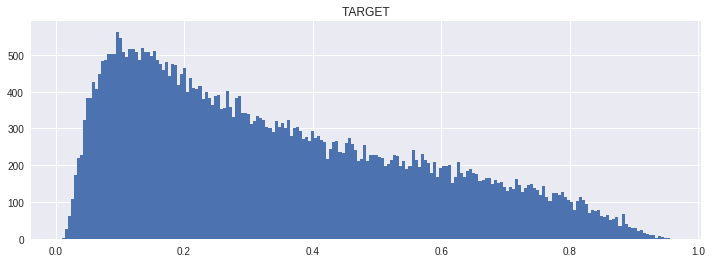

In [101]:
df_submit.hist(column='TARGET',bins=200)

## ---------------------------------------------------------------------------------------------------

## Define utility to observe the data and its distribution according to difficulty in payment

In [4]:
# Plots the distribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)